# とりあえずモデルの精度検査をする

アノテーションの位置も考慮して、判定すべき物体を認識する。
多分ほぼテストの完成形

## Pythonに上位層を読み込ませる

In [1]:
import sys
sys.path.append('../')

## モジュールインポート

In [1]:
import os,sys
import argparse
from yolo import YOLO
from PIL import Image
import numpy as n
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import shutil

Using TensorFlow backend.
/home/buffalokusojima/.pyenv/versions/3.6.8/envs/keras-yolo3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buffalokusojima/.pyenv/versions/3.6.8/envs/keras-yolo3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buffalokusojima/.pyenv/versions/3.6.8/envs/keras-yolo3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)

## 関数宣言

In [2]:
def detect_img(img_path):
     
    try:
        image = Image.open(img_path)
    except:
        print('Open Image Error:', img_path)
        return None, None
    else:
        r_image, result = yolo.detect_image(image)
        
    return r_image, result

In [3]:
def search_bbox(bbox, result_list):
    iou_max = 0
    iou_index = None
    for i, result in enumerate(result_list):
        if result[2] == None:
            continue
        iou =get_iou(bbox, result[1:5])
        if iou > iou_max:
            iou_max = iou
            iou_index = i
    return iou_index

In [4]:
def get_iou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = abs(xB - xA) * abs(yB - yA)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0])) * abs((boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0])) * abs((boxB[3] - boxB[1]))
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

## モデルデータ宣言

In [5]:
model_path = './logs/品種モデル20200723/2020-07-23_21:20:57.564468/7_さくらんぼ/trained_weights_final.h5'
class_path = 'model_data/品種モデル/7_さくらんぼ/class.txt'

## アウトプット先フォルダ宣言

In [6]:
outputPath = 'テスト結果/品種/7_さくらんぼ'

### yoloインスタンス作成

In [7]:
yolo = YOLO(model_path=model_path, classes_path=class_path)

Instructions for updating:
Colocations handled automatically by placer.
./logs/品種モデル20200723/2020-07-23_21:20:57.564468/7_さくらんぼ/trained_weights_final.h5 model, anchors, and classes loaded.


## テストファイルを読み込んでインプットとなる配列とアウトプットとなるクラス配列を作成

In [8]:
test_file = '../テストデータ/品種/random_100/7_さくらんぼ/test.txt'

In [9]:
test_x = []
test_y = []
bbox_list = []
with open(test_file, 'r', encoding='utf-8') as f:
    line = f.readline()
    while line:
        line = line.split(" ")
        test_x.append(line[0])
        test_y.append(int(line[1].split(",")[-1].replace("\n", "")))
        bbox_list.append([int(num.replace("\n", "")) for num in line[1].split(",")[:-1]])
        line = f.readline()

In [10]:
print(test_x)
print(test_y)
print(bbox_list)

['../テストデータ/品種/random_100/7_さくらんぼ/image/1480.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1509.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1460.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1356.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1440.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1387.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1411.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1499.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1513.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1378.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1463.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1382.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1354.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1494.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1391.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1394.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1402.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1377.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1517.jpg', '../テストデータ/品種/random_100/7_さくらんぼ/image/1429.jpg',

## クラスファイル読み込み

In [11]:
class_list = []
with open(class_path, 'r', encoding='UTF-8') as f:
    line = f.readline()
    while line:
        class_list.append(line.replace("\n",""))
        line = f.readline()

In [12]:
print(class_list)

['佐藤錦', '月山錦', '大将錦', '紅秀峰', '南陽']


## クラスファイルに読み込み失敗を追加

In [13]:
class_list.append('failed')
print(class_list)

['佐藤錦', '月山錦', '大将錦', '紅秀峰', '南陽', 'failed']


## 画像認識を回してく

In [14]:
result_list = []
for path in test_x:
    image, result = detect_img(path)
    if not result or len(result) == 0:
        result = [[class_list.index(class_list[-1]), None, None, None, None, None]]
    else:
        for r in result:
            r[0] = class_list.index(r[0])
    result_list.append({
        "image": image,
        "result": result
    })

(416, 416, 3)
Found 0 boxes for img
3.1213436849648133
(416, 416, 3)
Found 0 boxes for img
0.09938158304430544
(416, 416, 3)
Found 0 boxes for img
0.1071082609705627
(416, 416, 3)
Found 0 boxes for img
0.1029984459746629
(416, 416, 3)
Found 0 boxes for img
0.09822486399207264
(416, 416, 3)
Found 4 boxes for img
月山錦 0.34 (19, 358) (174, 452)
月山錦 0.57 (167, 409) (347, 481)
月山錦 0.61 (205, 25) (357, 244)
月山錦 0.74 (2, 43) (110, 292)
0.1253606720129028
(416, 416, 3)
Found 1 boxes for img
月山錦 0.41 (130, 11) (495, 450)
0.11580341297667474
(416, 416, 3)
Found 0 boxes for img
0.1005956589942798
(416, 416, 3)
Found 0 boxes for img
0.12446069001452997
(416, 416, 3)
Found 2 boxes for img
月山錦 0.64 (63, 18) (302, 664)
月山錦 0.81 (636, 63) (829, 780)
0.12918033095775172
(416, 416, 3)
Found 1 boxes for img
紅秀峰 0.42 (106, 52) (568, 484)
0.10936255799606442
(416, 416, 3)
Found 1 boxes for img
月山錦 0.70 (130, 34) (188, 188)
0.10676154197426513
(416, 416, 3)
Found 0 boxes for img
0.11232404998736456
(416, 416

Found 0 boxes for img
0.09905220702057704
(416, 416, 3)
Found 1 boxes for img
紅秀峰 0.42 (77, 10) (458, 286)
0.11647589702624828
(416, 416, 3)
Found 3 boxes for img
月山錦 0.37 (375, 302) (561, 517)
月山錦 0.52 (72, 64) (375, 578)
月山錦 0.80 (298, 240) (633, 511)
0.12341881199972704
(416, 416, 3)
Found 0 boxes for img
0.1029318009968847
(416, 416, 3)
Found 1 boxes for img
月山錦 0.78 (207, 7) (362, 399)
0.11357243300881237


In [15]:
print(result_list)

[{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x873 at 0x7F48962E87B8>, 'result': [[5, None, None, None, None, None]]}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=445x184 at 0x7F489625E4A8>, 'result': [[5, None, None, None, None, None]]}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=680x510 at 0x7F489625EAC8>, 'result': [[5, None, None, None, None, None]]}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7F489625ED30>, 'result': [[5, None, None, None, None, None]]}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x263 at 0x7F489625EDA0>, 'result': [[5, None, None, None, None, None]]}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7F489625EE10>, 'result': [[1, 19, 358, 174, 452, 0.33824697], [1, 167, 409, 347, 481, 0.5685897], [1, 205, 25, 357, 244, 0.6101694], [1, 2, 43, 110, 292, 0.73897564]]}, {'image': <PIL.JpegImagePlugin.JpegImageFile im

## 結果を可視化&保存

In [16]:
timestamp = datetime.datetime.now()
timestamp = str(timestamp).replace(" ", "_").replace(":", "_")
outputPath = os.path.join(outputPath, timestamp)
os.mkdir(outputPath)
print("folder made:", outputPath)

folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055


In [17]:
output_test_file = os.path.join(outputPath, test_file.split("/")[-1])
shutil.copyfile(test_file, output_test_file)
print("copy", test_file, "to", output_test_file)

copy ../テストデータ/品種/random_100/7_さくらんぼ/test.txt to テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/test.txt


### アノテーションのiouを計算して正解領域を検索

(例)リストの先頭の画像と、その予測、結果を例にする

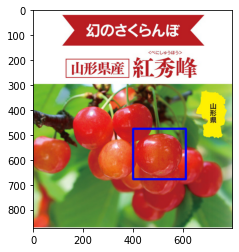

In [18]:
result = result_list[0]['result']
test_image = test_x[0]
test_image = test_image.split("/")[-1]
test_image = os.path.join("../train_set/参加者用データ/bbox_image",test_image)
test_image = Image.open(test_image)
plt.imshow(test_image)

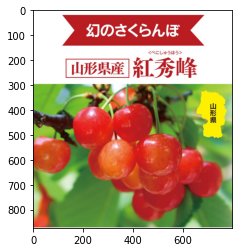

In [19]:
pred_image = result_list[0]['image']
plt.imshow(pred_image)

正解領域と、予測領域を表示

In [20]:
print("正解:",bbox_list[0])
print("予測:",result[0][1:5])

正解: [400, 475, 611, 677]
予測: [None, None, None, None]


iouの値を計算([0 -1])

In [21]:
print(get_iou(bbox_list[0], result[0][1:5]))

TypeError: '>' not supported between instances of 'NoneType' and 'int'

最もiouが高い領域を予測領域から選択する<br>
仮に選択肢が複数あったとする

In [22]:
pre_result = []
import copy
pre_result = copy.copy(result_list[0]['result'])
pre_result.append([0,0,100,200,300,400])
print(pre_result)
index = search_bbox(bbox_list[0], pre_result)
print("最適領域は:",index,"番目")

[[5, None, None, None, None, None], [0, 0, 100, 200, 300, 400]]
最適領域は: 1 番目


ここから予測結果から最適領域にあるラベルをまとめたリストを作成する

In [23]:
predict_list = []
for i, result in enumerate(result_list):
    
    index = search_bbox(bbox_list[i], result['result'])
    if index is None:
        predict_list.append(result['result'][0][0])
    else:
        predict_list.append(result['result'][index][0])

In [24]:
print(predict_list)

[5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 3, 1, 5, 5, 1, 1, 1, 0, 5, 5, 1, 5, 0, 2, 1, 1, 5, 5, 2, 1, 5, 1, 5, 5, 3, 5, 5, 0, 2, 1, 3, 5, 5, 5, 3, 1, 5, 5, 5, 5, 5, 0, 5, 2, 2, 2, 5, 5, 0, 3, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 1, 2, 3, 2, 5, 1, 3, 5, 5, 0, 3, 0, 1, 1, 3, 1, 2, 5, 1, 5, 5, 3, 0, 0, 2, 5, 3, 1, 5, 1]


In [25]:
if not class_list.index(class_list[-1]) in predict_list:
    class_list = class_list[:-1]
report = classification_report(test_y, predict_list, target_names=class_list)
print(report)
reportFile = os.path.join(outputPath, 'report.txt')
with open (reportFile, 'w', encoding='utf-8') as f:
    f.write(report)

              precision    recall  f1-score   support

         佐藤錦       0.78      0.32      0.45        22
         月山錦       1.00      1.00      1.00        22
         大将錦       0.55      0.29      0.37        21
         紅秀峰       0.36      0.24      0.29        17
          南陽       0.00      0.00      0.00        18
      failed       0.00      0.00      0.00         0

    accuracy                           0.39       100
   macro avg       0.45      0.31      0.35       100
weighted avg       0.57      0.39      0.45       100



/home/buffalokusojima/.pyenv/versions/3.6.8/envs/keras-yolo3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/buffalokusojima/.pyenv/versions/3.6.8/envs/keras-yolo3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
score = accuracy_score(test_y, predict_list)
print(score)

0.39


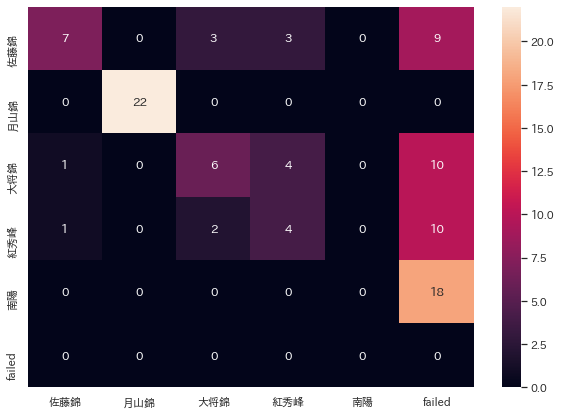

In [27]:
matrix = confusion_matrix(test_y, predict_list)
df_cm = pd.DataFrame(matrix, index=class_list, columns = class_list)
#df_cm = pd.DataFrame(matrix)
plt.figure(figsize=(10,7))
sn.set(font='IPAexGothic')
sn.heatmap(df_cm, annot=True)
confusionFile = os.path.join(outputPath, 'confusionMatrix')
plt.savefig(confusionFile)

### 不正解フォルダを作成して、そこに不正解だったクラスに対する正解フォルダを作成し、その直下に不正解のクラス名のフォルダを作成し、画像を格納する

In [28]:
falsePath = os.path.join(outputPath, "False")
os.mkdir(falsePath)
print("folder made:", falsePath)
for i, predict in enumerate(predict_list):
    
    if not predict == test_y[i]:
        destPath = os.path.join(falsePath, class_list[test_y[i]])
        if not os.path.isdir(destPath):
            os.mkdir(destPath)
            print("falder made:",destPath)
            
        destPath = os.path.join(destPath, class_list[predict])
        if not os.path.isdir(destPath):
            os.mkdir(destPath)
            print("folder made:", destPath)
        img_name = test_x[i].split("/")[-1]
        destFile = os.path.join(destPath, img_name)
        """
        shutil.copyfile(test_x[i], destFile)
        print("copy",test_x[i], "to", destFile)
        """
        result_list[i]['image'].save(destFile)
        
        
        destFile = os.path.join(destPath, img_name.replace("jpg", "txt"))
        with open(destFile, 'w', encoding='utf-8') as f:
            result = result_list[i]['result']
            for r in result:
                r = [str(c) for c in r]
                f.write(",".join(r))
                f.write("\n")

folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False
falder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/紅秀峰
folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/紅秀峰/failed
falder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/南陽
folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/南陽/failed
falder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/佐藤錦
folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/佐藤錦/failed
falder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/大将錦
folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/大将錦/failed
folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/大将錦/佐藤錦
folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/紅秀峰/大将錦
folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/佐藤錦/紅秀峰
folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/佐藤錦/大将錦
folder made: テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/False/大将錦/紅秀峰
folder made: テスト結果/品

### モデルも保存しておく

In [29]:
modelFile = os.path.join(outputPath, str(score)+'-model.h5')
shutil.copyfile(model_path, modelFile)
print("copy", model_path, "to", modelFile)

copy ./logs/品種モデル20200723/2020-07-23_21:20:57.564468/7_さくらんぼ/trained_weights_final.h5 to テスト結果/品種/7_さくらんぼ/2020-07-24_17_48_43.428055/0.39-model.h5
